In [1]:
import numpy as np
import os
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-dark')

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

SAVE_PATH_FIG = r'.\44_curves'
FIGURE_NAME = 'precision-recall'
FIGURE_FORMAT = 'svg'

In [2]:
# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define models
model_mcm = RandomForestClassifier(random_state=42)
model_dtbc = SVC(probability=True, random_state=42)
model_abc = LogisticRegression(random_state=42)

# Train models
model_mcm.fit(X_train, y_train)
model_dtbc.fit(X_train, y_train)
model_abc.fit(X_train, y_train)

# Predict probabilities
y_scores_mcm = model_mcm.predict_proba(X_test)[:, 1]
y_scores_dtbc = model_dtbc.predict_proba(X_test)[:, 1]
y_scores_abc = model_abc.predict_proba(X_test)[:, 1]

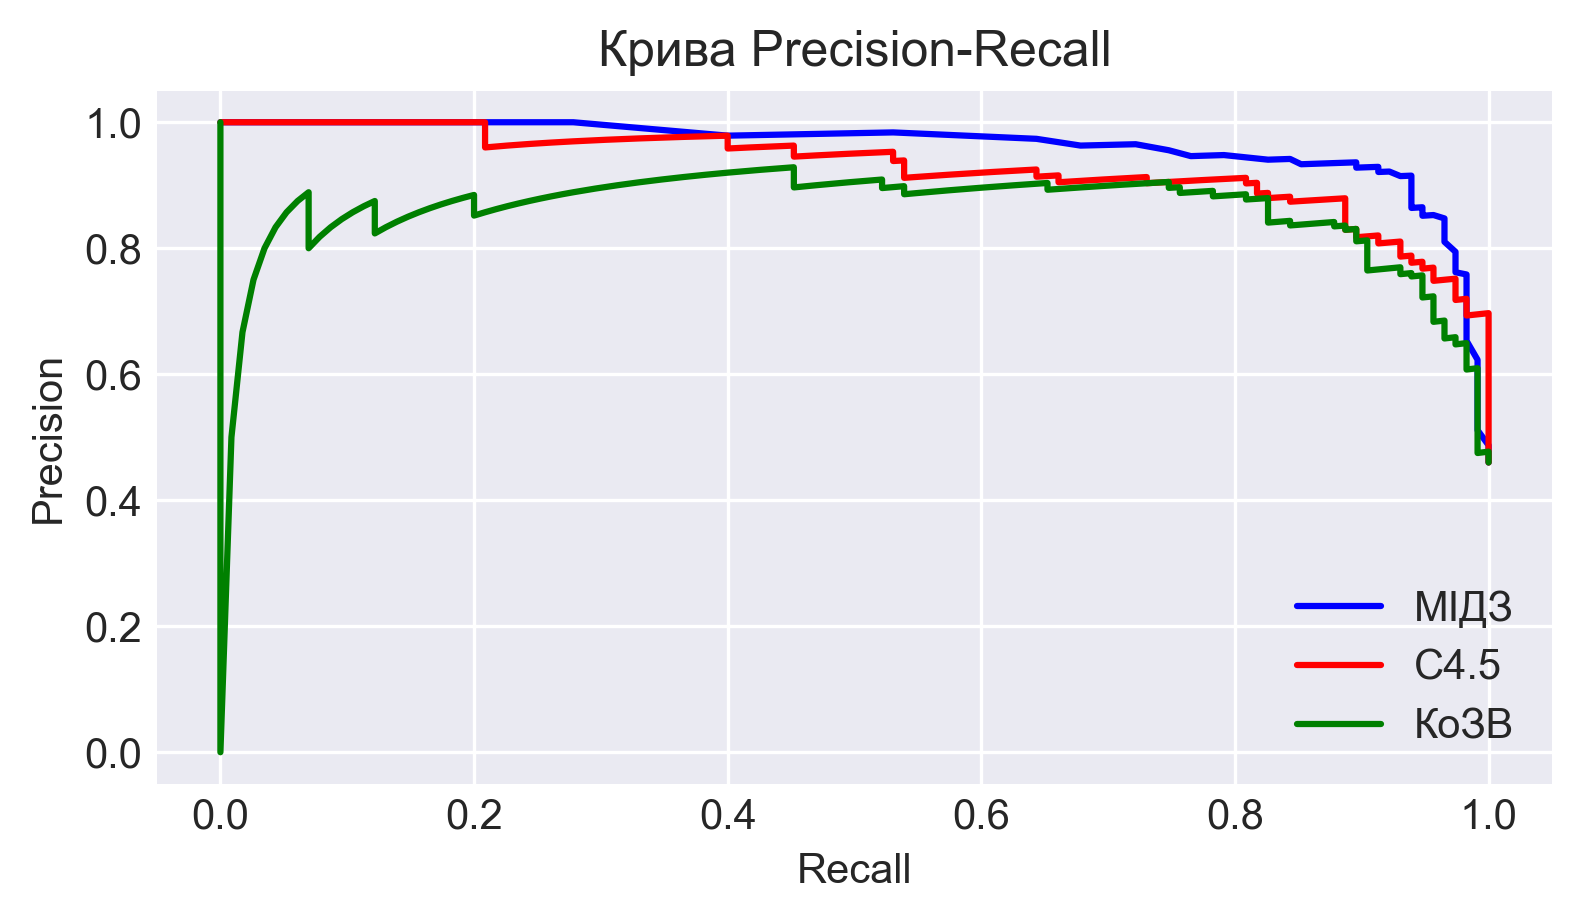

In [6]:
# Calculate Precision-Recall curves
precision_mcm, recall_mcm, _ = precision_recall_curve(y_test, y_scores_mcm)
precision_dtbc, recall_dtbc, _ = precision_recall_curve(y_test, y_scores_dtbc)
precision_abc, recall_abc, _ = precision_recall_curve(y_test, y_scores_abc)

my_save_path = os.path.join(SAVE_PATH_FIG, FIGURE_NAME + f'.{FIGURE_FORMAT}')

# Plot Precision-Recall curves
plt.figure(figsize=(6,3), dpi=300)

plt.plot(recall_mcm, precision_mcm, label='МІДЗ', color='blue')
plt.plot(recall_dtbc, precision_dtbc, label='С4.5', color='red')
plt.plot(recall_abc, precision_abc, label='КоЗВ', color='green')

#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Крива Precision-Recall')
plt.legend()
plt.grid(True)

plt.savefig(my_save_path, format=FIGURE_FORMAT, bbox_inches='tight')
plt.show()

In [4]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']
